# Ring Separation

In [27]:
import numpy as np
import mdtraj

import matplotlib.pyplot as plt

from itertools import product, combinations

import analysis

In [28]:
traj = analysis.load_dcd_file("../LHII_MD/output/1ps_2fs_LHII.dcd", "../LHII_MD/LH2.prmtop")
top = traj.top

Finished 'load_dcd_file' in 13.060207 secs


In [29]:
bcl_atoms = top.select("name =~ 'Mg*'")
bcl_atoms

array([13239, 13379, 13639, 13899, 14039, 14299, 14439, 14579, 14719,
       14859, 14999, 15259, 15519, 15659, 15919, 16059, 16199, 16339,
       16479, 16619, 16879, 17139, 17279, 17539, 17679, 17819, 17959])

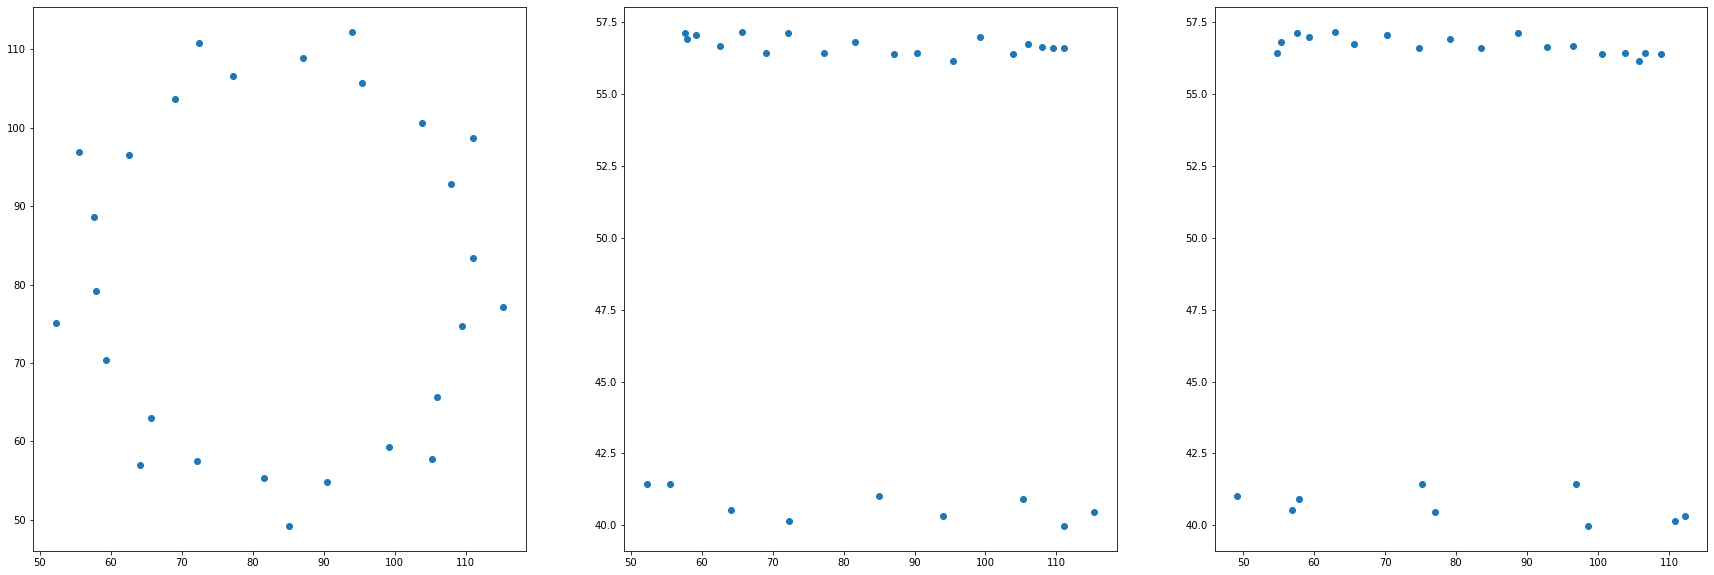

In [30]:
fig, ax = plt.subplots(1, 3)

bcl_xyz = 10 * traj.xyz[0][bcl_atoms]
ax[0].scatter(bcl_xyz[:,0], bcl_xyz[:,1])
ax[1].scatter(bcl_xyz[:,0], bcl_xyz[:,2])
ax[2].scatter(bcl_xyz[:,1], bcl_xyz[:,2])

fig.set_size_inches(30, 10)


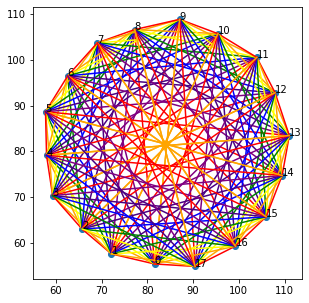

In [38]:
def distances(xyz):
    n = len(xyz)
    
    distances = np.zeros((n, n))
    
    for i in combinations(range(n), r=2):
        distances[i[0]][i[1]] = np.linalg.norm(xyz[i[0]] - xyz[i[1]])
        distances[i[1]][i[0]] = np.linalg.norm(xyz[i[0]] - xyz[i[1]])

    return np.array(distances)

fig, ax = plt.subplots(figsize=(5,5))

B800_ind = np.where(bcl_xyz[:,2] < 50)[0]
B850_ind = np.where(bcl_xyz[:,2] > 50)[0]

B850_xyz = bcl_xyz[B850_ind]

n = len(B850_xyz)

for i in range(n):
    ax.annotate(f"{i}", (B850_xyz[i][0], B850_xyz[i][1]))
    
    ax.plot([B850_xyz[i][0], B850_xyz[(i+1)%(n)][0]], [B850_xyz[i][1], B850_xyz[(i+1)%(n)][1]], color='red')
    ax.plot([B850_xyz[i][0], B850_xyz[(i+2)%(n)][0]], [B850_xyz[i][1], B850_xyz[(i+2)%(n)][1]], color='orange')
    ax.plot([B850_xyz[i][0], B850_xyz[(i+3)%(n)][0]], [B850_xyz[i][1], B850_xyz[(i+3)%(n)][1]], color='yellow')
    ax.plot([B850_xyz[i][0], B850_xyz[(i+4)%(n)][0]], [B850_xyz[i][1], B850_xyz[(i+4)%(n)][1]], color='green')
    ax.plot([B850_xyz[i][0], B850_xyz[(i+5)%(n)][0]], [B850_xyz[i][1], B850_xyz[(i+5)%(n)][1]], color='blue')
    ax.plot([B850_xyz[i][0], B850_xyz[(i+6)%(n)][0]], [B850_xyz[i][1], B850_xyz[(i+6)%(n)][1]], color='indigo')
    ax.plot([B850_xyz[i][0], B850_xyz[(i+7)%(n)][0]], [B850_xyz[i][1], B850_xyz[(i+7)%(n)][1]], color='purple')
    ax.plot([B850_xyz[i][0], B850_xyz[(i+8)%(n)][0]], [B850_xyz[i][1], B850_xyz[(i+8)%(n)][1]], color='red')
    ax.plot([B850_xyz[i][0], B850_xyz[(i+9)%(n)][0]], [B850_xyz[i][1], B850_xyz[(i+9)%(n)][1]], color='orange')

    
ax.scatter(B850_xyz[:,0], B850_xyz[:,1])

ax.set_aspect('equal')


In [32]:
B850_atoms = bcl_atoms[B850_ind]

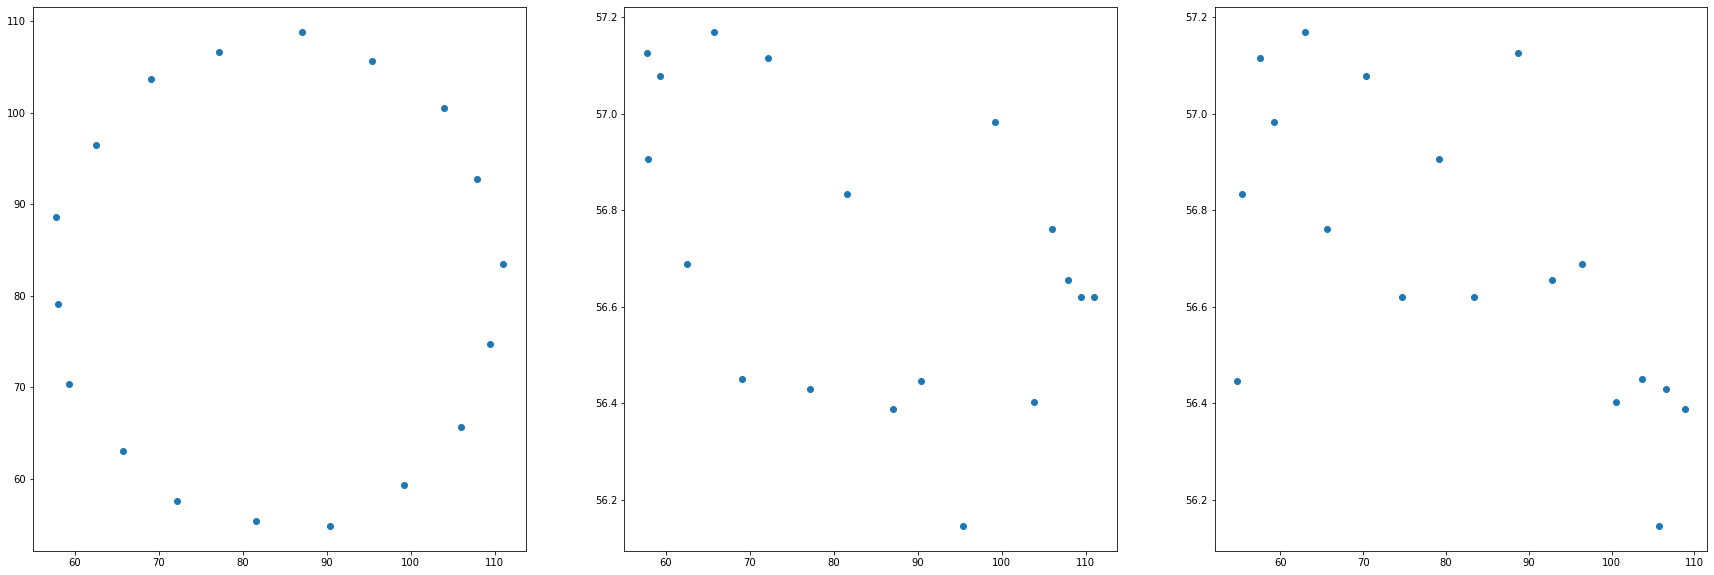

In [33]:
B850_xyz = traj.xyz[0][B850_atoms] * 10

fig, ax = plt.subplots(1, 3)

ax[0].scatter(B850_xyz[:,0], B850_xyz[:,1])
ax[1].scatter(B850_xyz[:,0], B850_xyz[:,2])
ax[2].scatter(B850_xyz[:,1], B850_xyz[:,2])

fig.set_size_inches(30, 10)


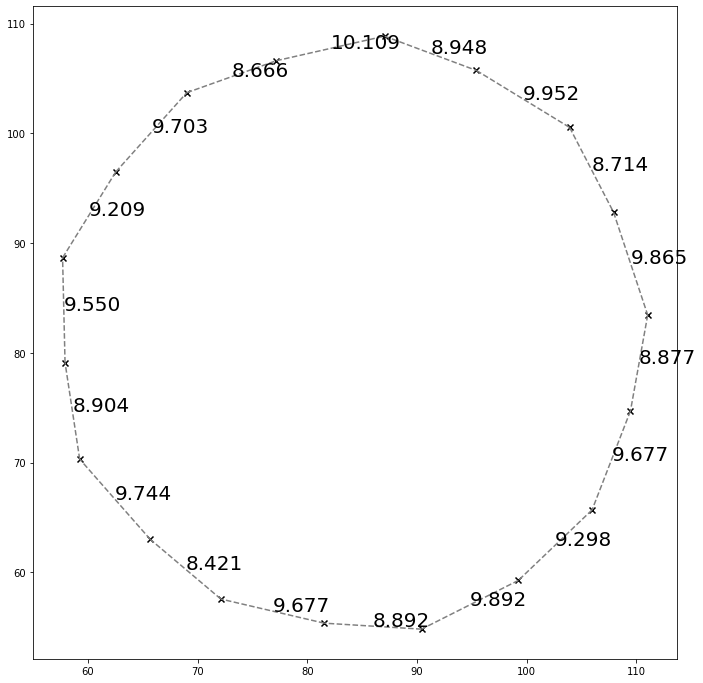

In [34]:
fig, ax = plt.subplots()

step = 1

for i in range(n):
    a_ind = B850_atoms[i]
    b_ind = B850_atoms[(i+step)%n]
    
    a = 10 * traj.xyz[0][B850_atoms[i]]
    b = 10 * traj.xyz[0][B850_atoms[(i+step)%n]]

    ax.scatter(a[0], a[1], color='black', marker='x')
    
    ax.plot([a[0], b[0]], [a[1], b[1]], color='grey', linestyle='--')
    
    ax.annotate(f"{10 * mdtraj.compute_distances(traj, [[a_ind, b_ind]])[0][0]:3.3f}", (a[0] + 0.5*(b[0]-a[0]), a[1] + 0.5*(b[1]-a[1])), fontsize=20)
    
ax.set_aspect('equal')

fig.set_size_inches(12,12)

153.0
[7. 6. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 8. 9. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 6. 7. 3. 0. 0. 0. 0. 0. 0. 0. 0. 5. 4. 7. 2. 0. 0. 0. 0. 0. 0.
 3. 8. 6. 1. 0. 0. 0. 0. 5. 4. 4. 3. 2. 0. 1. 7. 7. 4. 5. 3. 9. 9.]


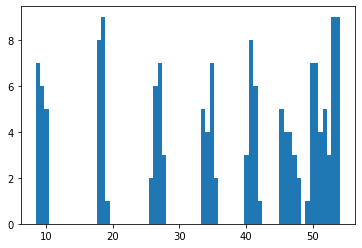

In [71]:
import itertools

pairs = itertools.combinations(B850_atoms, r=2)

dists = 10 * mdtraj.compute_distances(traj, np.array(list(pairs)))

unassigned_freq, bins, _ = plt.hist(dists[0], bins=70)

print(sum(unassigned_freq))

print(unassigned_freq)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


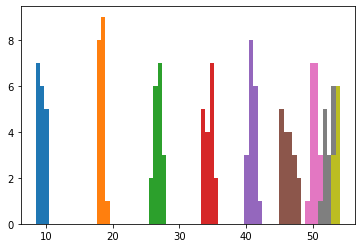

In [77]:
all_pairs = list(itertools.combinations(bcl_atoms, 2))

Mg_distances = 10 * mdtraj.compute_distances(traj, all_pairs)

steps = [[] for x in range(9)]

for step in range(9):
    for enum, i in enumerate(all_pairs):
        if i[0] not in bcl_atoms or i[1] not in bcl_atoms:
            continue
        
        for j in range(n):
            a_ind = B850_atoms[j]
            b_ind = B850_atoms[(j+step+1)%n]

            if (i[0] == a_ind and i[1] == b_ind) or (i[0] == b_ind and i[1] == a_ind) and enum not in steps[step]:
                steps[step].append(enum)

freqs = np.zeros(len(bins)-1)

for indices in steps:
    freq, _, _ = plt.hist(Mg_distances[:,indices][0], bins=bins)
    
    freqs += freq

print(freqs - unassigned_freq)

In [80]:
steps_dict = {}

for enum, i in enumerate(steps):
    steps_dict[f"separation_{enum+1}"] = i
    
print(steps_dict)

{'separation_1': [1, 25, 51, 76, 120, 142, 180, 199, 231, 247, 273, 286, 306, 316, 330, 337, 345, 349], 'separation_2': [2, 23, 53, 74, 77, 122, 143, 182, 200, 233, 248, 275, 287, 308, 317, 332, 338, 347], 'separation_3': [4, 22, 54, 72, 79, 97, 123, 145, 183, 202, 234, 250, 276, 289, 309, 319, 333, 340], 'separation_4': [5, 20, 56, 71, 80, 95, 125, 140, 146, 185, 203, 236, 251, 278, 290, 311, 320, 335], 'separation_5': [7, 19, 57, 69, 82, 94, 126, 138, 148, 160, 186, 205, 237, 253, 279, 292, 312, 322], 'separation_6': [8, 17, 59, 68, 83, 92, 128, 137, 149, 158, 188, 197, 206, 239, 254, 281, 293, 314], 'separation_7': [10, 16, 60, 66, 85, 91, 129, 135, 151, 157, 189, 195, 208, 214, 240, 256, 282, 295], 'separation_8': [11, 14, 62, 65, 86, 89, 131, 134, 152, 155, 191, 194, 209, 212, 242, 245, 257, 284], 'separation_9': [13, 63, 88, 132, 154, 192, 211, 243, 259]}


In [81]:
import json
with open('mg_pairs.json', 'w') as f:
    json.dump(steps_dict, f)